# TP2 Part1: Over-fitting and regularization
Date : 04/11/19  
Duration: 1h30  
@Carl Rlgr

1. [Over-fitting: how to deals with it ?](#Over-fitting:-how-to-deal-with-it-?)
    1. [Some ideas](#Some-ideas)
    1. [Example: Ordinary Least Squares](#Example:-Ordinary-Least-Squares)
1. [Regularization, Penalization with Linear Models](#Regularization,-Penalization-with-Linear-Models)
    1. [Ridge Regression - l2 penalization](#Ridge-Regression---l2-penalization)
    1. [Lasso Regression - l1 penalization](#Lasso-Regression---l1-penalization)
    1. [Elastic-net Regression - l1/l2 penalization](#Elastic-net-Regression---l1/l2-penalization)
1. [Bootstrapping, Bagging, Ensemble](#Bootstrapping,-Bagging,-Ensemble)
1. [Biblio](#Biblio)


## Over-fitting: how to deal with it ?

Overfitting may occur when a statistical model describes random errors or noise instead of the underlying variable relationships. An overfitted model will generally have poor predictive performance as it may exaggerate minor fluctuations in the data and misinterpret others. The overfitting phenomenon has three main explanations:
- excessively complex model
- multicollinearity
- high dimensionality

A learning algorithm is calibrated using a set of training samples. When the algorithm overfits on the training set, the performance on training samples will improve while the performance on test sample set will decline. 
<img src="img/overfitting.png" alt="Overfitting illustration" style="width: 600px;"/>


### Some ideas
#### First idea: penalization

Regularization is a method that applies to objective functions (loss function here) in ill-posed optimization problems. The aim is to constrain the optimization in order to avoid overfitting.  
To do so, we use  a penalty technique. It adds a term, called a penalty function, to the objective function consisting in a penalty parameter multiplied by a measure of violation of the constraints, often a norm (for example for euclidean norm $\mathcal{l}_2$-norm or Euclidean norm  for Ridge).  

A way to estimate this hyper parameter is to split our data in three part : a training set, testing set and validation set. The first is used to calibrate a model, the second to estimate penalty parameters and the last to evaluate prediction performance of the thus built model.  

#### Second idea: better sampling

Sample methods can be used to train both model's parameters and hyper-parameters (from regularization for example). There are plenty of methods to avoid over-fitting by sampling; here are detailed cross validation, bootstrapping, bagging (and ensemble which is not really a sample method).

### Example: Ordinary Least Squares
Linear regression models the output (or target) variable y $\in R$ as a linear combination of the P-dimensional input x $\in R^P$.  
Let $y$ be the N-dimensional vector of outputs in the training set and $X$ be the $N\times(P+1)$ $X$ matrix with each row an input vector (with a 1 in the first position). The linear regression will predict $y$ vector given $X$ matrix
using the parameter vector (or weight) $\beta \in R^{P+1}$ like following:  
$$\begin{aligned}
y &= f(\beta) + \varepsilon\\
 &= X\beta + \varepsilon\\
\end{aligned}
$$
$\varepsilon \in  R^N$ are the residuals (or errors) of the prediction. The $\beta$ parameters minimize the loss function $L(\beta)$ i.e. the error measured on the data. This error is the Mean Squared Errors (MSE).  
$$\begin{aligned}
\text{OLS}(\beta) &= L(\beta) \\
&= ||y - X\beta||^2_2 \\
&= \sum_{i=1}^N (y_i - x_i^T \beta)^2
\end{aligned}
$$

***
_Quick question: recall the estimator formula of a standard OLS:_  
_Answer:_  

$$\hat{\beta} = argmin_{\beta} ||y - X\beta||^2$$
Assuming that the $P+1$ columns of the matrix $X$ are linearly independent, this minimization problem has a unique solution.
$$(X^TX){\hat{\beta}}=X^Ty$$
X is a positive semi-definite matrix by definition, thus:
$$\hat{\beta} = (XX^T)^{-1}X^Ty$$


In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def load_extended(dataset):
    X = dataset.data

    X = MinMaxScaler().fit_transform(dataset.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, dataset.target

dataset = load_boston()
X, y = load_extended(dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

_Scatter plot labels according to input indexed 12 from training set:_ 

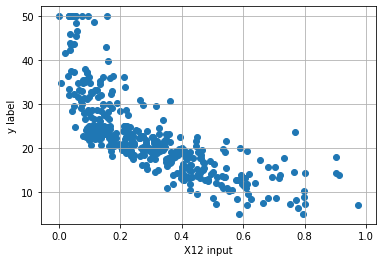

In [2]:
index = 12
plt.scatter(X_train[:,12], y_train)
plt.ylabel('y label')
plt.xlabel('X{} input'.format(index))
plt.grid()
plt.show()

_Print input and label shapes:_

In [3]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (379, 104)
Shape of y_train: (379,)


_How many features $P$ for this model ? How many obervations $N$?_

_Import LinearRegression model, fit it to training data, then compute its prediction accuracy both on trainind and testing set:_

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [5]:
r2_train = r2_score(y_train, lr_train)
r2_test = r2_score(y_test, lr_test)

print('Training set R2 score: %.3f' % r2_train)
print('Testing set R2 score:  %.3f' % r2_test)

Training set R2 score: 0.952
Testing set R2 score:  0.607


_Print the coefficients and the intercept of the regression:_

In [6]:
print('Coefficients (without intercept):\n %s' % lr.coef_)
print('Intercept: %.2f' % lr.intercept_)

Coefficients (without intercept):
 [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.101

# Regularization, Penalization with Linear Models
To avoid overfitting, which create complex weight vectors due to noise or spurious correlations within predictors, adding a penalty to the learning reduce bias ie the capacity of the learning algorithm. The basis of regression regularization methods such as LASSO and ridge regression comes from bias-variance decomposition, but won't be detailed here.  
Thus, usual loss function $L(\beta)$ is combined with the penalty function $\omega(\beta)$ which gives the new objective function:   
$$\text{Penalized}(\beta) = L(\beta) + \lambda \omega(\beta)$$

### Ridge Regression - l2 penalization
For Ridge regression the penalty function $\omega(\beta)$ is the euclidean norm of the coefficients, as following:    
$$\text{Ridge}(\beta) = ||y - X\beta||^2_2 + \lambda ||\beta||^2_2$$
Increasing $\lambda$ forces coefficients to move towards zero, which decreases training set performance, but might help generalization. The more $\lambda$ is close to zero, the more the model resembles linear regression.

Notice that $\lambda$ is alpha parameter in sklearn.

_Import Ridge from sklearn.linear_model and fit to train sample:_

In [7]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

_Print ridge score on training and testing sets:_

In [8]:
print('Training set R2 score: %.3f' % ridge.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % ridge.score(X_test, y_test))

Training set R2 score: 0.886
Testing set R2 score:  0.753


_Fit a Ridge with $\alpha$ parameter at 10. Then, print ridge score on training and testing sets:_

In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set R2 score: %.3f' % ridge10.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % ridge10.score(X_test, y_test))

Training set R2 score: 0.788
Testing set R2 score:  0.636


_What do you note ?_  
_Answer:_  

_Fit a Ridge with $\alpha$=0.1. Then, print ridge score on training and testing sets:_  

In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set R2 score: %.3f' % ridge01.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % ridge01.score(X_test, y_test))

Training set R2 score: 0.928
Testing set R2 score:  0.772


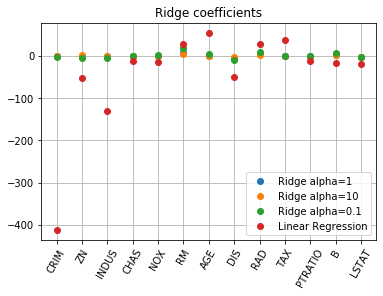

In [11]:
N = len(dataset.feature_names) # Number of variables to show
plt.title('Ridge coefficients')
plt.plot(ridge.coef_[:N], 'o', label='Ridge alpha=1')
plt.plot(ridge10.coef_[:N], 'o', label='Ridge alpha=10')
plt.plot(ridge01.coef_[:N], 'o', label='Ridge alpha=0.1')
plt.plot(lr.coef_[:N], 'o', label='Linear Regression')
plt.xticks(range(len(dataset.feature_names)), dataset.feature_names, rotation=60) 
plt.grid()
plt.legend()
plt.show()

_How can you interprete the above graph ?_  
_Answer:_

### Lasso Regression - l1 penalization

Least Absolute Shrinkage and Selection Operator (popularized in 1996) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability.  
Lasso regression uses the $\mathcal{l}_1$-norm as penalty function. This constraint will reduce bias of the learning algorithm.  Adding this constraint forces the coefficients to be small by shrinking them toward zero. This penalty forces some coefficients to be exactly zero, providing a feature selection property. The objective function to minimize becomes:
$$Lasso(\beta) = ||y - X\beta||^2_2 + \lambda ||\beta||_1$$ 

_Import Lasso from sklearn.linear_model and fit to train sample. Then, print LASSO scores on train and test sets, as well as the number of features used:_

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set R2 score: %.3f' % lasso.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % lasso.score(X_test, y_test))
print('Number of features used: %d' % sum(lasso.coef_ != 0))

Training set R2 score: 0.293
Testing set R2 score:  0.209
Number of features used: 4


_What can you say?_  
_Answer:_  

Train LASSO with $\alpha=0.01$:

In [13]:
lasso01 = Lasso(alpha=0.01).fit(X_train, y_train)
print('Training set R2 score: %.3f' % lasso01.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % lasso01.score(X_test, y_test))
print('Number of features used: %d' % sum(lasso01.coef_ != 0))

Training set R2 score: 0.896
Testing set R2 score:  0.768
Number of features used: 32


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318371, tolerance: 3.2331821266490763
  positive)


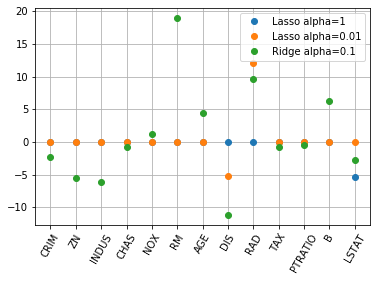

In [14]:
plt.plot(lasso.coef_[:N], 'o', label='Lasso alpha=1')
plt.plot(lasso01.coef_[:N], 'o', label='Lasso alpha=0.01')
plt.plot(ridge01.coef_[:N], 'o', label='Ridge alpha=0.1')
plt.xticks(range(len(dataset.feature_names)), dataset.feature_names, rotation=60) 
plt.grid()
plt.legend()
plt.show()

_How can you interprete the above graph ?_  
_Answer:_

### Elastic-net Regression - l1/l2 penalization
The Elastic-net model combines both $\mathcal{l}_1$ and $\mathcal{l}_2$ penalties with $\alpha$ as the global penalty and $p$ as the l1/l2 ratio. The loss function is :
$$Enet(\beta) = ||y - X\beta||^2_2 + \alpha (p||\beta||_1 + (1-p)||\beta||^2_2)$$

<img src="img/lasso.png" alt="" style="width: 600px;"/>


_Import ElasticNet from sklearn.linear_model and fit to train sample. Then, print its scores on train and test sets:_

In [15]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.01, l1_ratio=1).fit(X_train, y_train)
print('Training set R2 score: %.3f' % enet.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % enet.score(X_test, y_test))

Training set R2 score: 0.896
Testing set R2 score:  0.768


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318371, tolerance: 3.2331821266490763
  positive)


Same with $\alpha=0.1$ and l1_ratio $=1$:

In [16]:
enet = ElasticNet(alpha=0.1, l1_ratio=1).fit(X_train, y_train)
print('Training set R2 score: %.3f' % enet.score(X_train, y_train))
print('Testing set R2 score:  %.3f' % enet.score(X_test, y_test))

Training set R2 score: 0.771
Testing set R2 score:  0.630


_Compare these scores with usual linear regression._  
_Answer_  

A question arises: how to determine optimaly hyper-parameters like $\alpha$ or $\mathcal{l}_1$ ratio ?

# Sample Methods

Sample methods can used in order to avoid overfitting. Here are presented several methods, including cross validation which can be used both in overfitting and regularizaion.

### Cross validation.
It is a resampling procedure used to evaluate quality of models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. For example when k is 10 we call it 10-fold cross-validation.  
The general procedure is as follows:  
- Shuffle the data set randomly
- Split the data set into k groups
- For each group:  
    - Take the group as test data set  
    - Take the remaining groups as a training data set  
    - Fit a model on the training set and evaluate it on the test set  
    - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

<img src="img/crossvalidation.png" alt="Cross validation scheme" style="width: 400px;"/>

_We will use GridSearchCV and specify three parameters:
the model considered, the hyper-parameters and the number of folds. GridSearchCV proceed the cross validation on all the hyper-parameters and return the best one._  

_Import GridSearchCV from sklearn.model_selection._  
_Call a Ridge model._  
_Construct a dictionnary named alphas including several alpha values to be tested._  
_Initialize a 5-folds cross validation named ridgeCV, with ridge model, alphas and cv attributes._
_Eventually, fit ridgeCV on training sample._

In [17]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alphas = {'alpha': [1e-10, 1e-6, 1e-3, 0.01, 0.1, 1, 5, 10, 20]}
ridgeCV = GridSearchCV(ridge, alphas, cv=5) #scoring=r2_score

ridgeCV.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-06, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

_Print best_params_ and best_score_ of ridgeCV:_

In [18]:
print('Best alpha:', ridgeCV.best_params_)
print('Best score:', ridgeCV.best_score_)

Best alpha: {'alpha': 0.1}
Best score: 0.8482741329711142


In our little set of alphas, 0.1 gives the best score. But is it robust?  
Bellow you can find a little piece of code shearching the best alpha among 50 possiblilities via 5-foldes cross validation.

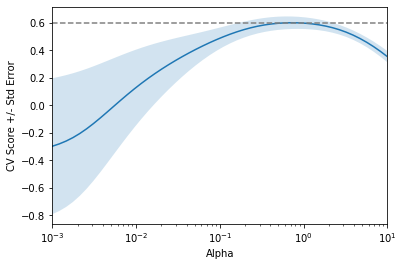

In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-3, 1, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))


# Display the plot
plt.plot(alpha_space, ridge_scores)
std_error = ridge_scores_std / np.sqrt(10)
plt.fill_between(alpha_space, ridge_scores + std_error, ridge_scores - std_error, alpha=0.2)
plt.ylabel('CV Score +/- Std Error')
plt.xlabel('Alpha')
plt.axhline(np.max(ridge_scores), linestyle='--', color='.5')
plt.xlim([alpha_space[0], alpha_space[-1]])
plt.xscale('log')
plt.show()

### Bootstrapping, Bagging, Ensemble

__Ensemble__ relies on the idea that we can lower variance by using the wisdom of the crowd, for example averaging the score across 10 or 20 predictors, as opposed to relying on only one. This has shown to improve accuracy and so its recommended that you explore ensemble techniques. One of the most popular ones is Random Forests, which rely on a specified amount of Decision Trees to create predictions.  

__Boosting__ refers to any Ensemble method that can combine several weak learners into a strong learner and is used to reduce bias and variance. It does this through a weighted majority vote (classification) or a weighted sum (regression). Ada boost and Gradient boost are two popular methods.  

__Bootstrapping__ is a sampling technique with replacement. This ends up leaving some data unselected (on average 63% are sampled), while the remaining 37% of the training instances that are not sampled are called out-of-bag instances. Since the predictor never sees the out of bag instances during training, it can be evaluated on these instances without the need for a separate validation set or cross validation.  

<img src="img/bagging.png" alt="Bagging and bootstrapping schemes" style="width: 600px;"/>

__Bagging__ otherwise known as bootstrap aggregating, is used to reduce variance which helps avoid overfitting. The idea is that once you have your sample from bootstrapping, you can then build a series of models. This ensemble of models, will carry votes with equal weight and you’re able to use that average.  


<img src="img/bagging2.png" alt="Bagging and bootstrapping tables" style="width: 600px;"/>

In [20]:
X = load_diabetes().data
y = load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


lr = LinearRegression().fit(X_train, y_train)
print('R2 score without bagging: ')
print('Training set: %.3f' % lr.score(X_train, y_train))
print('Testing set:  %.3f' % lr.score(X_test, y_test))

R2 score without bagging: 
Training set: 0.555
Testing set:  0.359


_Implement a bagging algorithm for K (to be chosen) OLS models._  
_Then, compare bagging results with the OLS model:_

In [21]:
from sklearn.ensemble import BaggingRegressor

K = 5 # Bagging parameter
olsbag = BaggingRegressor(LinearRegression(), n_estimators=K)
olsbag.fit(X_train, y_train)

print('R2 score with bagging: ')
print('Training set: %.3f' % olsbag.score(X_train, y_train))
print('Testing set:  %.3f' % olsbag.score(X_test, y_test))

R2 score with bagging: 
Training set: 0.554
Testing set:  0.349


In [22]:
K = 5 # Bagging parameter

listOLSmodel = []
for _ in range(K):
    X_train_kept, X_train_left, y_train_kept, y_train_left = train_test_split(X_train, y_train, test_size=.33)
    ols = LinearRegression().fit(X_train_kept, y_train_kept)
    listOLSmodel.append(ols)

In [23]:
R2_train = sum([listOLSmodel[i].score(X_train, y_train) for i in range(K)])/K
R2_test = sum([listOLSmodel[i].score(X_test, y_test) for i in range(K)])/K

print('R2 score with bagging: ')
print('Training set: %.3f' % R2_train)
print('Testing set:  %.3f' % R2_test)

R2 score with bagging: 
Training set: 0.549
Testing set:  0.343


In [24]:
print('Details of each model:')
for i in range(K):
    print('Model OLS {}:'.format(i))
    print('Training set R2 score: %.3f' % listOLSmodel[i].score(X_train, y_train))
    print('Testing set R2 score:  %.3f' % listOLSmodel[i].score(X_test, y_test))

Details of each model:
Model OLS 0:
Training set R2 score: 0.547
Testing set R2 score:  0.366
Model OLS 1:
Training set R2 score: 0.551
Testing set R2 score:  0.348
Model OLS 2:
Training set R2 score: 0.545
Testing set R2 score:  0.319
Model OLS 3:
Training set R2 score: 0.553
Testing set R2 score:  0.343
Model OLS 4:
Training set R2 score: 0.548
Testing set R2 score:  0.336


# Biblio

• "Notes on Regularized Least Squares", Rifkin & Lippert  
• "Generalized Linear Models", Scikit-learn, Section 1.1; learn.org/stable/modules/linear_model.html  
• "Regularization Path For Generalized linear Models by Coordinate Descent," Friedman, Hastie & Tibshirani, J Stat Softw, 2010.  
• "An Interior-Point Method for Large-Scale L1-Regularized Least Squares", S.J.Kim, K.Koh, M.Lustig, S.Boyd and D.Gorinevsky, in IEEE Journal of Selected Topics in Signal Processing, 2007.  
• "Bagging predictors", Breiman, Leo (1996) Machine Learning.  